# Simple Fun #27: Rectangle Rotation

[Kata на Codewars.com](https://www.codewars.com/kata/5886e082a836a691340000c3)

## Task. 

A rectangle with sides equal to even integers a and b is drawn on the Cartesian plane. Its center (the intersection point of its diagonals) coincides with the point (0, 0), but the sides of the rectangle are not parallel to the axes; instead, they are forming 45 degree angles with the axes.

How many points with integer coordinates are located inside the given rectangle (including on its sides)?

Example. For a = 6 and b = 4, the output should be 23

The following picture illustrates the example, and the 23 points are marked green.

![Caption](./blob37_.png)

I'd like to use linear algebra at the task. Matrix operations can easily shift and rotate any original rectangle, coincides with the point (0, 0).

In [1]:
import numpy as np
import matplotlib.pylab as plt

a = 6 # height of the rectangle, along Y-axis
b = 4 # width of the rectangle, along X-axis

In [2]:
M = np.array([[0,0],[0,a],[b,a],[b,0]]) # vertex matrix - vertex coordinates at original space
v_shift = [b/2, a/2] # shift vector - to shift center of the rectangle from origin (0, 0)
M2 = M - v_shift # vertex matrix - shifted

In [3]:
fi = -45*np.pi/180 # rotation angle in degrees, clockwise
R = np.array([[np.cos(fi), np.sin(fi)],[-np.sin(fi), np.cos(fi)]]) # rotation matrix
M3 = M2.dot(R) # vertex matrix - shifted and rotated

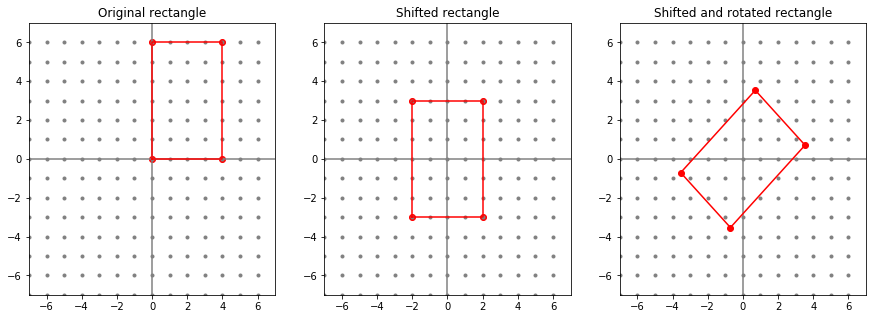

In [4]:
# demo pictures
limits = [-7,7] # bounds of plots
xv, yv = np.meshgrid(np.arange(*limits), np.arange(*limits))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))

M_ = np.append(M,[M[0]],axis=0)
ax1.set(xlim=limits, ylim=limits, title='Original rectangle')
ax1.hlines(0,*limits,color='grey')
ax1.vlines(0,*limits,color='grey')
ax1.scatter(M[:,0], M[:,1], marker='o', color='red')
ax1.scatter(xv, yv, color='grey', marker='.')
ax1.plot(M_[:,0], M_[:,1], 'r-')

M2_ = np.append(M2,[M2[0]],axis=0)
ax2.set(xlim=limits, ylim=limits, title='Shifted rectangle')
ax2.hlines(0,*limits,color='grey')
ax2.vlines(0,*limits,color='grey')
ax2.scatter(M2[:,0], M2[:,1], marker='o', color='red')
ax2.scatter(xv, yv, color='grey', marker='.')
ax2.plot(M2_[:,0], M2_[:,1], 'r-')

M3_ = np.append(M3,[M3[0]],axis=0)
ax3.set(xlim=limits, ylim=limits, title='Shifted and rotated rectangle')
ax3.hlines(0,*limits,color='grey')
ax3.vlines(0,*limits,color='grey')
ax3.scatter(M3[:,0], M3[:,1], marker='o', color='red')
ax3.scatter(xv, yv, color='grey', marker='.')
ax3.plot(M3_[:,0], M3_[:,1], 'r-')

plt.show()

Now we know rectangle vertex and can define lines $$ y = a \cdot x + b,$$ which are restrict the figure. Then count points inside it by checking four inclined condictions.

It's not quite easy and nice solution, up to me. Look at the left picture. It's very easy to define if a point belongs to the rectangle limited by horizontal and vertical lines. So my solution is to take all candidate points, grey on right picture, and apply reverse tranformation from the 'rotated and shifted' space (right picture) to the 'original' one (left picture):
* fill candidate points' matrix by grey points coordinates
* rotate the matrix by the opposite angle
* shift the matrix by vector to the 'original' space. The rectangle now coincides with the point (0, 0).
* count the points inside rectangle

Let's do some demonstration. Take two points (2,1) и (2,-1). The first one belongs to rectangle, the second one is outside it.

In [5]:
P = np.array([[2,1],[2,-1]]) # two points
R_ = np.transpose(R) # reverse rotation matrix
P2 = P.dot(R_)
P3 = P2 + v_shift # points at 'original space'

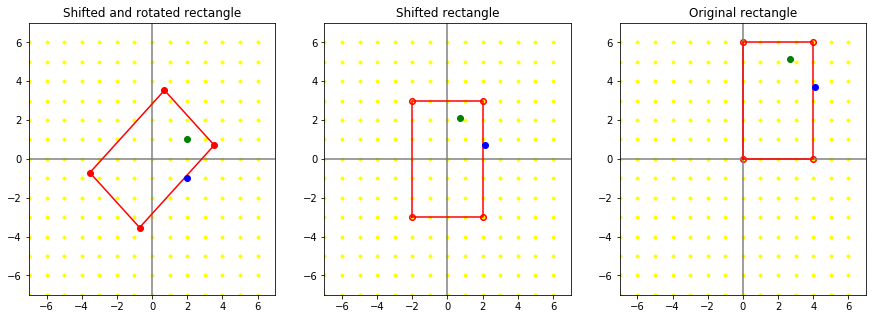

In [6]:
# show demo
fig, (ax3, ax2, ax1) = plt.subplots(1, 3, figsize = (15,5))

ax1.set(xlim=limits, ylim=limits, title='Original rectangle')
ax1.hlines(0,*limits,color='grey')
ax1.vlines(0,*limits,color='grey')
ax1.scatter(M[:,0], M[:,1], marker='o', color='red')
ax1.scatter(xv, yv, color='yellow', marker='.')
ax1.plot(M_[:,0], M_[:,1], 'r-')
ax1.plot(*P3[0], 'go')
ax1.plot(*P3[1], 'bo')

ax2.set(xlim=limits, ylim=limits, title='Shifted rectangle')
ax2.hlines(0,*limits,color='grey')
ax2.vlines(0,*limits,color='grey')
ax2.scatter(M2[:,0], M2[:,1], marker='o', color='red')
ax2.scatter(xv, yv, color='yellow', marker='.')
ax2.plot(M2_[:,0], M2_[:,1], 'r-')
ax2.plot(*P2[0], 'go')
ax2.plot(*P2[1], 'bo')

ax3.set(xlim=limits, ylim=limits, title='Shifted and rotated rectangle')
ax3.hlines(0,*limits,color='grey')
ax3.vlines(0,*limits,color='grey')
ax3.scatter(M3[:,0], M3[:,1], marker='o', color='red')
ax3.scatter(xv, yv, color='yellow', marker='.')
ax3.plot(M3_[:,0], M3_[:,1], 'r-')
ax3.plot(*P[0], 'go')
ax3.plot(*P[1], 'bo')

plt.show()

It's clear, two points keep their position relatively the rectangle. The green point stays inside the figure, the blue point stays outside it. Now check all grey, candidate points.

In [9]:
N = np.c_[xv.ravel(),yv.ravel()] # candidate points' matrix
N2 = N.dot(R_) # rotate matrix
N3 = N2 + v_shift # shift matrix

# count candidate points belong to the rectangle
f1, f2, f3, f4 = (N3[:,0]>=0, N3[:,1]>=0, N3[:,0]<=b, N3[:,1]<=a)
f = f1 & f2 & f3 & f4
print("Points located inside the given rectangle: ", sum(f))

Points located inside the given rectangle:  23


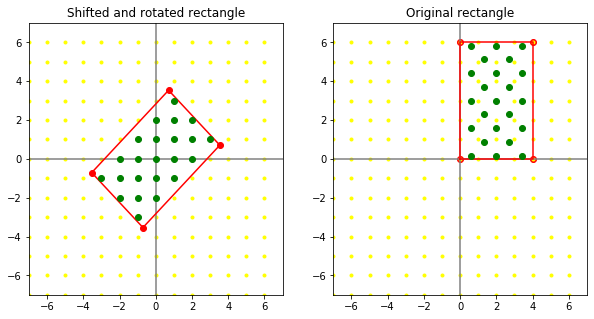

In [10]:
fig, (ax3, ax1) = plt.subplots(1, 2, figsize = (10,5))

ax1.set(xlim=limits, ylim=limits, title='Original rectangle')
ax1.hlines(0,*limits,color='grey')
ax1.vlines(0,*limits,color='grey')
ax1.scatter(M[:,0], M[:,1], marker='o', color='red')
ax1.scatter(xv, yv, color='yellow', marker='.')
ax1.plot(M_[:,0], M_[:,1], 'r-')
ax1.plot(N3[f,0], N3[f,1], 'go')

ax3.set(xlim=limits, ylim=limits, title='Shifted and rotated rectangle')
ax3.hlines(0,*limits,color='grey')
ax3.vlines(0,*limits,color='grey')
ax3.scatter(M3[:,0], M3[:,1], marker='o', color='red')
ax3.scatter(xv, yv, color='yellow', marker='.')
ax3.plot(M3_[:,0], M3_[:,1], 'r-')
ax3.plot(N[f,0], N[f,1], 'go')

plt.show()

## Conclusions

Proposed decision allows to count the points inside the rectangle with given voluntary height, width and rotation angle.